In [2]:
!pip install shapely

# Chargement et nettoyage des données

## Chargement des données

Dans cette étape, nous chargeons les données à partir du fichier CSV en utilisant pandas. Nous vérifions ensuite s'il y a des valeurs manquantes dans chaque colonne et affichons le nombre de valeurs manquantes par colonne.


In [3]:
import pandas as pd

# Remplacez l'ID_DU_FICHIER par l'ID réel de votre fichier sur Google Drive
google_drive_id = "1FZTkN5FC2p43SFuiupq7Os3ZMChIopUP"
google_drive_url = f"https://drive.google.com/uc?id={google_drive_id}"

# Chargement des données depuis l'URL avec le bon séparateur
data = pd.read_csv(google_drive_url, sep=';')


## Compréhension de mon ensemble de données

### Affichage des premières lignes du DataFrame

Nous affichons un aperçu des premières lignes du DataFrame pour avoir un aperçu des données.


In [4]:
# Afficher les premières lignes du DataFrame
print("Aperçu des premières lignes du DataFrame :")
print(data.head())

Aperçu des premières lignes du DataFrame :
      id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   

   numero                                        lieu id_emplacement  \
0     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN  PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   

  libelle_francais      genre         espece variete  c

### Informations sur les types de données et les valeurs non nulles

Nous affichons les informations sur les types de données de chaque colonne ainsi que le nombre de valeurs non nulles.


In [5]:
# Afficher les informations sur les types de données et les valeurs non nulles
print("\nInformations sur les types de données et les valeurs non nulles :")
print(data.info())


Informations sur les types de données et les valeurs non nulles :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  s

### Nombre de valeurs uniques dans chaque colonne

Nous comptons le nombre de valeurs uniques dans chaque colonne du DataFrame.


In [6]:
# Afficher le nombre de valeurs uniques dans chaque colonne
print("\nNombre de valeurs uniques dans chaque colonne :")
print(data.nunique())


Nombre de valeurs uniques dans chaque colonne :
id                     200137
type_emplacement            1
domanialite                 9
arrondissement             25
complement_addresse      3795
numero                      0
lieu                     6921
id_emplacement          69040
libelle_francais          192
genre                     175
espece                    539
variete                   436
circonference_cm          531
hauteur_m                 143
stade_developpement         4
remarquable                 2
geo_point_2d_a         200107
geo_point_2d_b         200114
dtype: int64


## Nettoyage des données

Dans cette étape, nous effectuons plusieurs opérations de nettoyage sur les données, notamment :
- Suppression des colonnes inutiles
- Suppression des lignes en doublon
- Conversion des colonnes numériques en types appropriés
- Remplacement des valeurs vides par des valeurs par défaut
- Suppression des valeurs aberrantes dans les colonnes circonference_cm et hauteur_m


In [7]:
# Vérifier s'il manque des valeurs dans chaque colonne
missing_values = data.isnull().sum()

# Afficher le nombre de valeurs manquantes par colonne
print(missing_values)
data.head(10)

# Suppression des colonnes inutiles
colonnes_a_supprimer = ['complement_addresse', 'numero', 'id_emplacement']
data = data.drop(colonnes_a_supprimer, axis=1)

# Suppression des lignes en doublon
data = data.drop_duplicates()

# Conversion des colonnes numériques en types appropriés
data['circonference_cm'] = pd.to_numeric(data['circonference_cm'], errors='coerce')
data['hauteur_m'] = pd.to_numeric(data['hauteur_m'], errors='coerce')

# Remplacement des valeurs vides par des valeurs par défaut
valeurs_par_defaut = {'domanialite': 'Inconnu', 'libelle_francais': 'Inconnu', 'genre': 'Inconnu', 'espece': 'Inconnu', 'variete': 'Inconnu', 'stade_developpement':'Inconnu'}
data = data.fillna(value=valeurs_par_defaut)

# Suppression des valeurs aberrantes dans les colonnes circonference_cm et hauteur_m
def remove_outliers(df, column, threshold):
    df_filtered = df[df[column] <= threshold]
    return df_filtered

# Appliquer la fonction de suppression des valeurs aberrantes
data = remove_outliers(data, 'circonference_cm', 700)
data = remove_outliers(data, 'hauteur_m', 35)


id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


# Analyse exploratoire

## Hauteur et circonférence

Dans cette étape, nous visualisons les distributions des variables 'circonference_cm' et 'hauteur_m' à l'aide de diagrammes à moustaches (boxplots). Les diagrammes à moustaches sont utiles pour visualiser la répartition des valeurs, les valeurs aberrantes potentielles et la dispersion des données.


### Circonférence : zoom sur la moustache de droite

Dans cette étape, nous effectuons égaleent un zoom sur la moustache de droite du diagramme à moustaches de la variable 'circonference_cm'. Ce zoom nous permet d'examiner de plus près les valeurs extrêmes à droite de la moustache.

Ensuite, nous affichons le libellé français de chaque arbre dont la circonférence se situe entre 230 et 235 centimètres en ajoutant du texte à chaque point correspondant sur le graphique. Cela nous donne une indication visuelle des espèces d'arbres qui ont des circonférences extrêmement élevées.

Enfin, nous filtrons les arbres avec une circonférence supérieure à 200 centimètres et affichons le décompte de la répartition de ces arbres par libellé français.


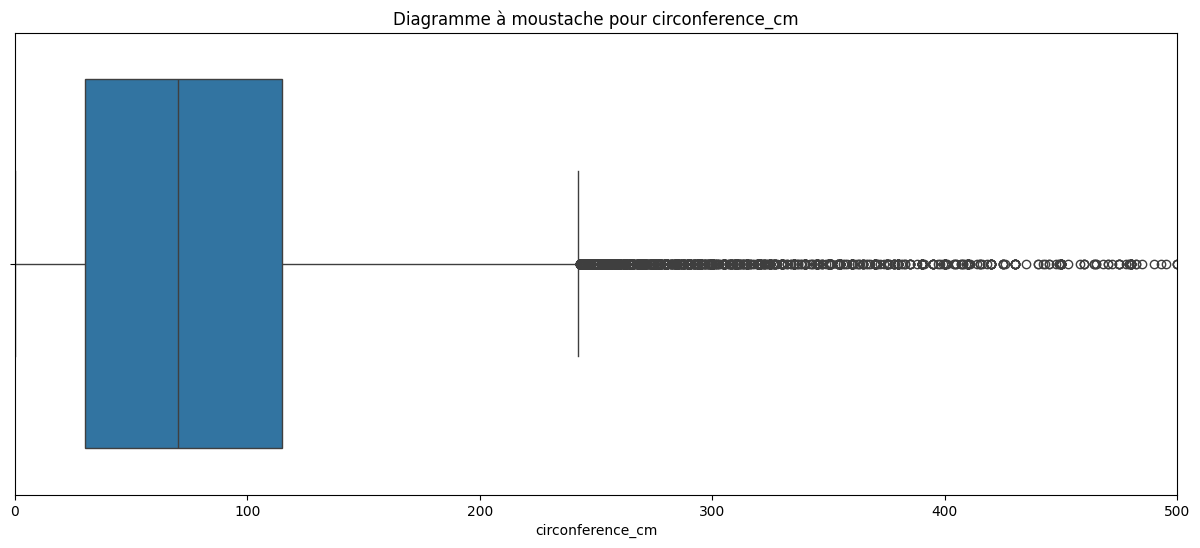

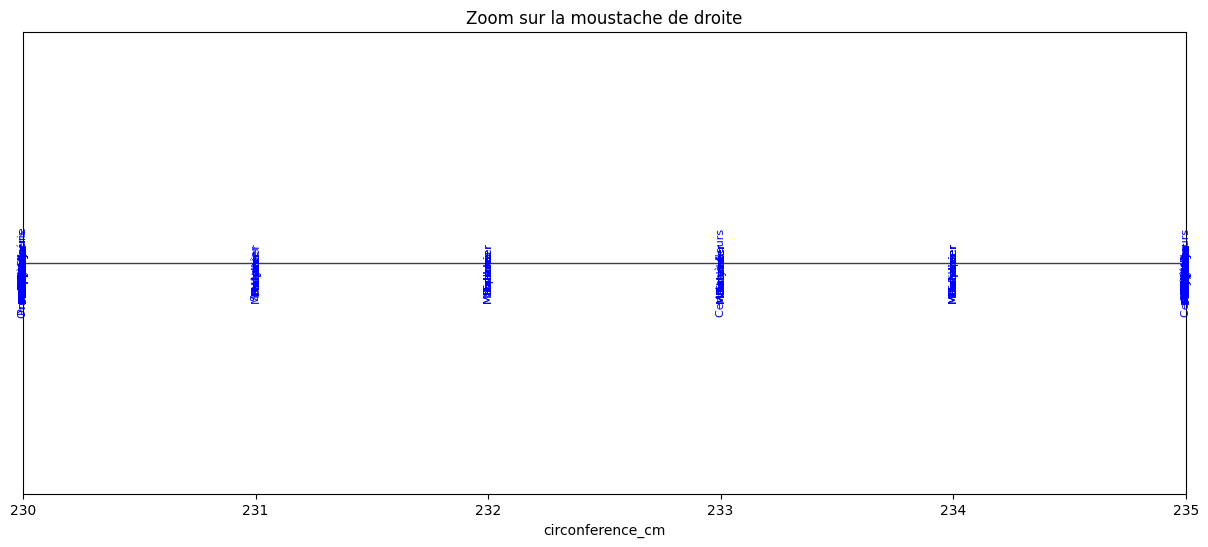

Dénombrement de la répartition des arbres avec circonférence > 200 par libellé_français:
libelle_francais
Platane               4053
Marronnier            2289
Peuplier               432
Erable                 406
Tilleul                211
                      ... 
Charme-Houblon           1
Eucalyptus               1
Oranger des Osages       1
Mélèze                   1
Poirier à fruits         1
Name: count, Length: 63, dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Réaliser un diagramme à moustache pour circonference_cm
plt.figure(figsize=(15, 6))
sns.boxplot(x='circonference_cm', data=data)
plt.title('Diagramme à moustache pour circonference_cm')
plt.xlim(0, 500)  # Ajuster les limites de l'axe des abscisses

# Faire un zoom sur la moustache de droite et les valeurs à droite de cette moustache
plt.figure(figsize=(15, 6))
sns.boxplot(x='circonference_cm', data=data)
plt.title('Zoom sur la moustache de droite')
plt.xlim(230, 235)  # Ajuster les limites de l'axe des abscisses pour le zoom

# Ajouter le texte 'libelle_francais' pour chaque point entre les limites définies
for index, row in data[(data['circonference_cm'] >= 230) & (data['circonference_cm'] <= 235)].iterrows():
    plt.text(row['circonference_cm'], 0.02, row['libelle_francais'], rotation=90, ha='center', va='center', color='blue', fontsize=8)
plt.show()

# Filtrer les arbres avec une circonférence supérieure à 200
arbres_circonference_sup_200 = data[data['circonference_cm'] > 200]

# Dénombrement de la répartition en fonction du libellé_français
repartition_par_libelle = arbres_circonference_sup_200['libelle_francais'].value_counts()

# Afficher le résultat
print("Dénombrement de la répartition des arbres avec circonférence > 200 par libellé_français:")
print(repartition_par_libelle)

### Interprétation du Diagramme à Moustache

Le diagramme à moustache a été généré pour évaluer la distribution des caractéristiques des arbres, notamment les circonférences (`circonference_cm`) et les hauteurs (`hauteur_m`). Voici quelques points clés à considérer dans l'interprétation de ce graphique :

- Les caractéristiques des arbres dans notre ensemble de données sont très diverses en raison de la présence de différentes espèces.

- Observation de quelques points légèrement au-dessus du critère de 3 IQR. Cependant, la diversité naturelle des caractéristiques des arbres peut varier considérablement entre les espèces.
Donc points légèrement supérieurs ne semblent pas compromettre la validité de nos données, car ils peuvent être cohérents avec la biologie des différentes espèces d'arbres présentes dans notre ensemble de données.

En conclusion aucune donnée aberrante significative identifiée en débit de la présence de ces points.


## Domanialité

Cette colonne a 9 catégories:

- DFPE
- Jardin
- PERIPHERIQUE
- DJS
- CIMETIERE
- DASES
- DAC
- Alignement
- DASCO

In [24]:
domanialites = list(set(data.domanialite))

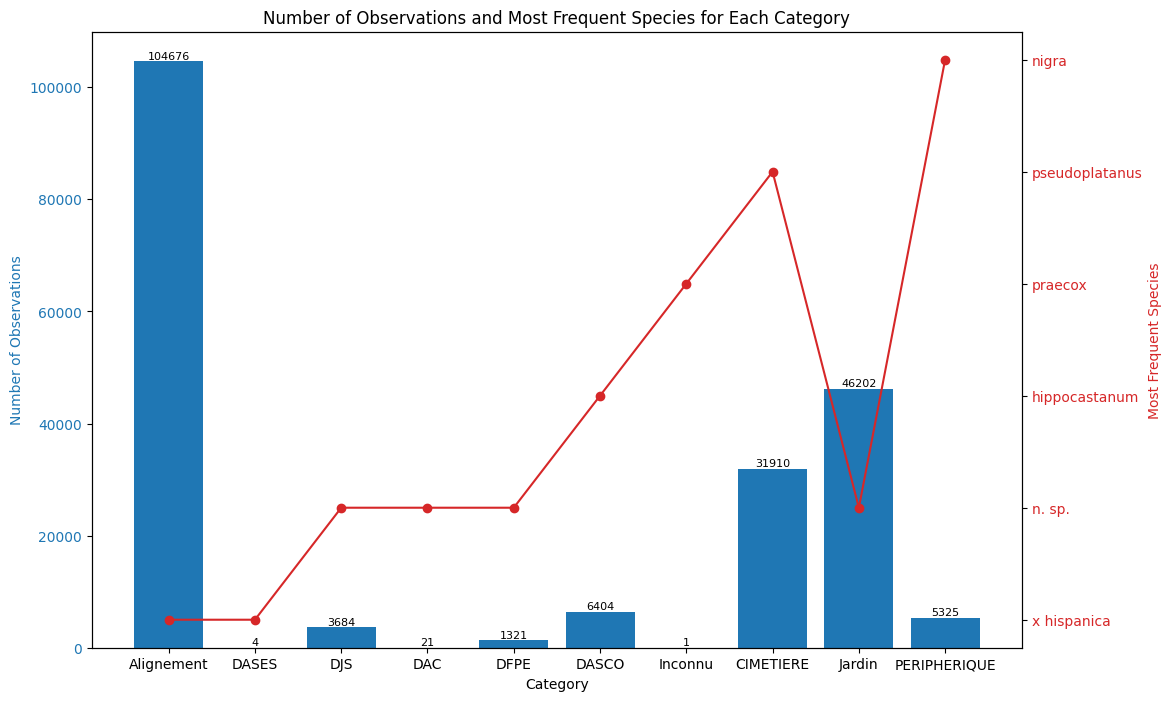

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Création de listes pour stocker les données à afficher dans le graphique
categories = []
observations_counts = []
most_frequent_species = []

# Itération à travers chaque catégorie de propriété ou de statut foncier
for domanialite in domanialites:
    if type(domanialite) == str:
        # Filtrer les données pour la catégorie de domanialité actuelle
        data_t = data[data['domanialite'] == domanialite]

        # Stocker les informations nécessaires dans les listes
        categories.append(domanialite)
        observations_counts.append(data_t.shape[0])
        most_frequent_species.append(data_t['espece'].mode().iloc[0])

# Création d'un DataFrame pour faciliter la manipulation des données
df_plot = pd.DataFrame({'Category': categories, 'Observations': observations_counts, 'Most Frequent Species': most_frequent_species})

# Création du graphique à barres groupées
fig, ax1 = plt.subplots(figsize=(12, 8))

# Barres pour le nombre d'observations
color = 'tab:blue'
ax1.set_xlabel('Category')
ax1.set_ylabel('Number of Observations', color=color)
bars = ax1.bar(df_plot['Category'], df_plot['Observations'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Ajout des annotations au-dessus de chaque barre
for bar, value in zip(bars, df_plot['Observations']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom', color='black', fontsize=8)

# Ajout d'un deuxième axe y pour l'espèce la plus fréquente
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Most Frequent Species', color=color)
ax2.plot(df_plot['Category'], df_plot['Most Frequent Species'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Rotation des étiquettes pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Titre du graphique
plt.title('Number of Observations and Most Frequent Species for Each Category')

# Affichage du graphique
plt.show()

**Commentaire :** À partir de cette figure, nous constatons que la majorité des arbres se concentrent dans "Alignement" et "Jardin", tandis que le nombre d'arbres dans DAC, DASES, "DJS" et "DFPE" est nettement inférieur.

## Arrondissement

Visualisation de la répartition des arbres par arrondissement :

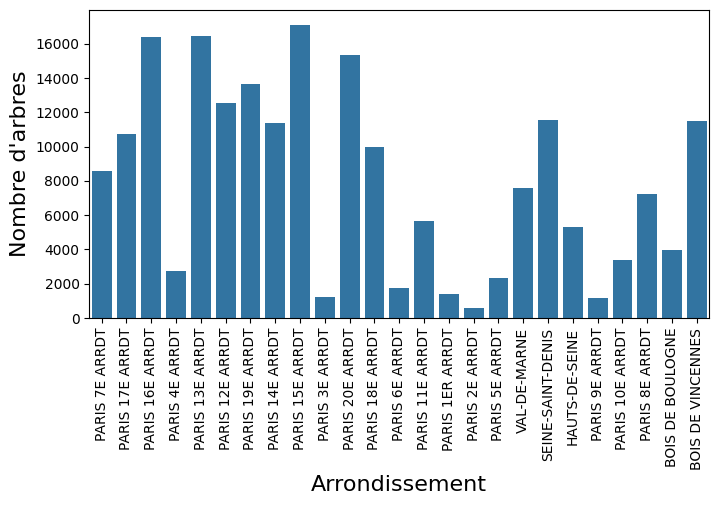

In [9]:
# Graphique de répartition des arbres en fonction de l'arrondissement (inversé)
plt.figure(figsize=(8, 4))
sns.countplot(x='arrondissement', data=data)
plt.ylabel("Nombre d'arbres", fontsize=16)
plt.xlabel('Arrondissement', fontsize=16)
plt.xticks(rotation=90)  # Si vous voulez faire pivoter les noms des arrondissements
plt.show()




**Commentaire :** À partir de la figure ci-dessus, nous constatons que la grande majorité des arbres sont concentrés dans les arrondissements de **15, 13, 16 et 20**. En revanche, on observe une densité notablement plus faible d'arbres dans les arrondissements de **6 à 1** et dans les Hauts-de-Seine.

Découvrons l'espèce la plus fréquente par arrondissement :

In [10]:
arrondissements = list(set(data['arrondissement']))

for arrondissement in arrondissements:
  print(arrondissement)
  df_arrondissement = data[data['arrondissement'] == arrondissement]
  print("Le nombre d'arbres dans cet arrondissement est de: ", df_arrondissement.shape[0])
  print("L'espèce la plus fréquente est:", df_arrondissement['espece'].mode().iloc[0])



PARIS 9E ARRDT
Le nombre d'arbres dans cet arrondissement est de:  1167
L'espèce la plus fréquente est: x hispanica
PARIS 6E ARRDT
Le nombre d'arbres dans cet arrondissement est de:  1755
L'espèce la plus fréquente est: x hispanica
PARIS 13E ARRDT
Le nombre d'arbres dans cet arrondissement est de:  16477
L'espèce la plus fréquente est: x hispanica
PARIS 20E ARRDT
Le nombre d'arbres dans cet arrondissement est de:  15328
L'espèce la plus fréquente est: x hispanica
PARIS 18E ARRDT
Le nombre d'arbres dans cet arrondissement est de:  9983
L'espèce la plus fréquente est: x hispanica
PARIS 1ER ARRDT
Le nombre d'arbres dans cet arrondissement est de:  1406
L'espèce la plus fréquente est: x hispanica
BOIS DE BOULOGNE
Le nombre d'arbres dans cet arrondissement est de:  3974
L'espèce la plus fréquente est: hippocastanum
PARIS 2E ARRDT
Le nombre d'arbres dans cet arrondissement est de:  546
L'espèce la plus fréquente est: x hispanica
PARIS 7E ARRDT
Le nombre d'arbres dans cet arrondissement est d

## Libellé français

Nombre de catégorérie de libellés français :

In [11]:
print(len(set(data.libelle_francais)))

193


In [12]:
data.libelle_francais.value_counts()

libelle_francais
Platane       42368
Marronnier    25162
Tilleul       21224
Erable        18363
Sophora       11779
              ...  
Maackie           1
Jujubier          1
Camphrier         1
Sycopsis          1
Garrya            1
Name: count, Length: 193, dtype: int64

## Genre

Nombre de catégorérie de genre :

In [13]:
print(len(set(data.genre)))

176


In [14]:
data.genre.value_counts()

genre
Platanus      42451
Aesculus      25296
Tilia         21468
Acer          18445
Sophora       11812
              ...  
Sycopsis          1
Enkianthus        1
Euscaphis         1
Caragana          1
Phoenix           1
Name: count, Length: 176, dtype: int64

## Espèce

Nombre de catégorérie d'espèce d'arbre :

In [15]:
print(len(set(data.espece)))

540


In [16]:
data.espece.value_counts()

espece
x hispanica                  36307
hippocastanum                20004
japonica                     11805
n. sp.                        9048
tomentosa                     8889
                             ...  
polycarpa                        1
x gondouinii                     1
lusitanica subsp.azorica         1
oliveri                          1
delavayi subsp. potaninii        1
Name: count, Length: 540, dtype: int64

## Stade de développement

### Création de diagrammes circulaires pour la distribution des stades de développement par arrondissement

Dans cette étape, nous créons des diagrammes circulaires pour visualiser la distribution des stades de développement des arbres pour chaque arrondissement de Paris. Chaque diagramme circulaire représente la répartition des stades de développement dans un arrondissement spécifique.


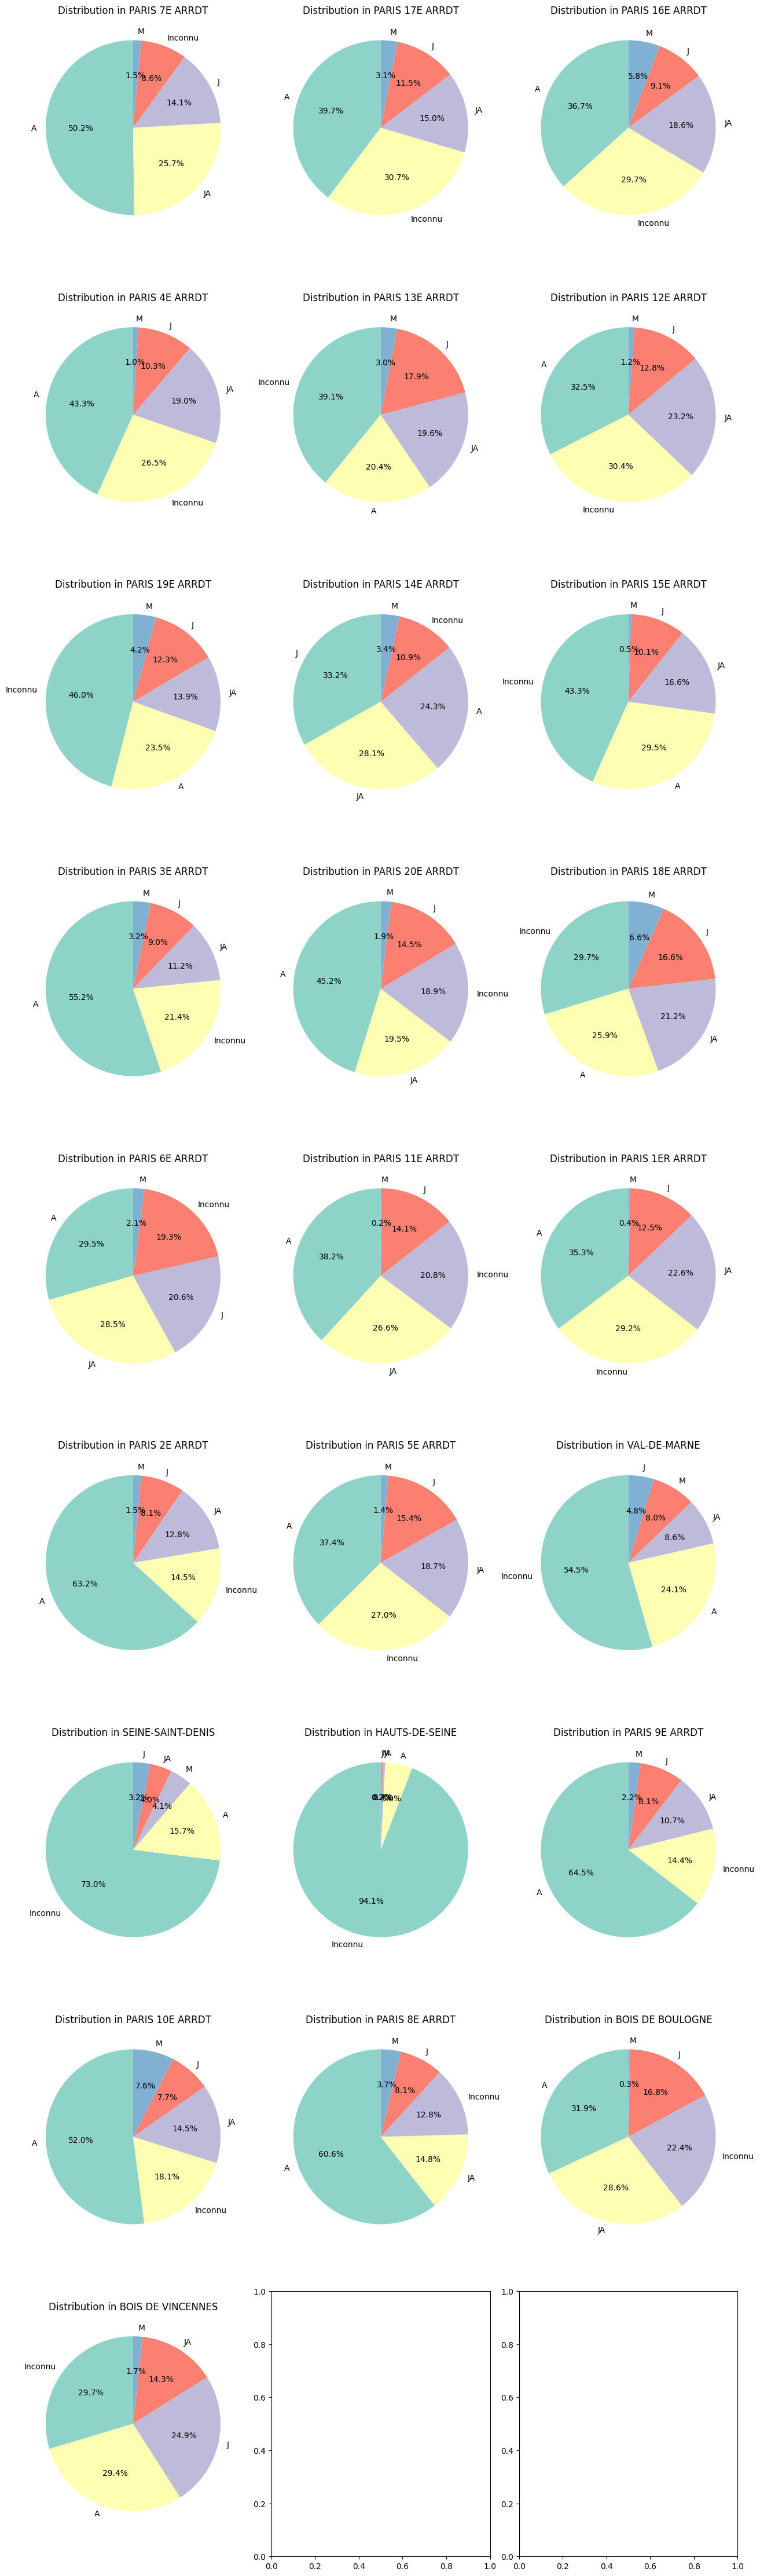

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la palette de couleurs
palette = sns.color_palette("Set3", n_colors=len(data['stade_developpement'].unique()))

# Définir le nombre de sous-graphiques en fonction du nombre d'arrondissements
num_subplots = len(data['arrondissement'].unique())
num_cols = 3  # Vous pouvez ajuster le nombre de colonnes selon votre préférence
num_rows = -(-num_subplots // num_cols)  # Calculer le nombre de lignes nécessaires

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Aplatir la grille pour faciliter l'indexation
axes = axes.flatten()

# Boucler à travers chaque arrondissement et créer un diagramme circulaire
for i, arrondissement in enumerate(data['arrondissement'].unique()):
    plt.sca(axes[i])
    subset_data = data[data['arrondissement'] == arrondissement]

    # Utiliser la palette définie pour conserver la même couleur par catégorie
    subset_data['stade_developpement'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=palette)

    plt.title(f'Distribution in {arrondissement}')
    plt.ylabel('')  # Pour supprimer l'étiquette d'axe y

# Ajuster la disposition et afficher
plt.tight_layout()

# Ajouter une légende à côté du graphique
plt.subplots_adjust(right=0.85)
plt.legend(title='Stade de Développement', bbox_to_anchor=(1.2, 0.5))

plt.show()


<ipython-input-18-e462bd234e08>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['circonference_cm'], hist = False, label = 'circumference')


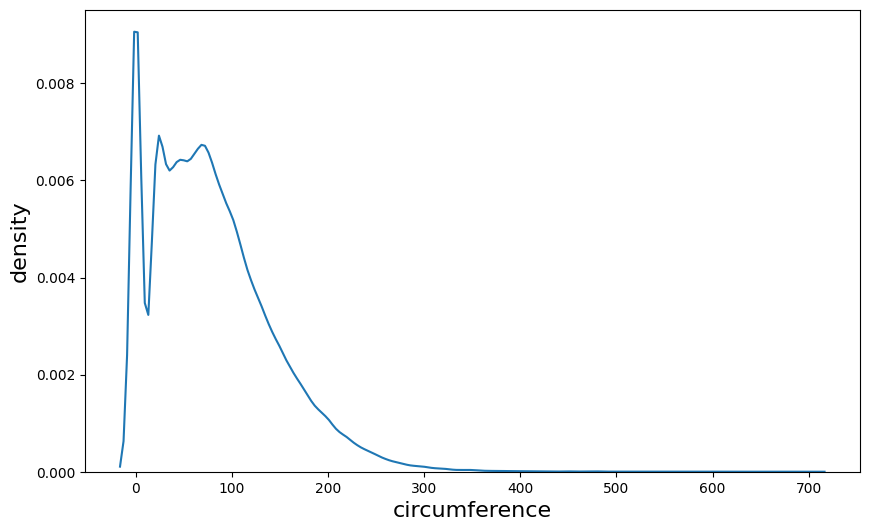

<ipython-input-18-e462bd234e08>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hauteur_m'], hist = False, label = 'circumference')


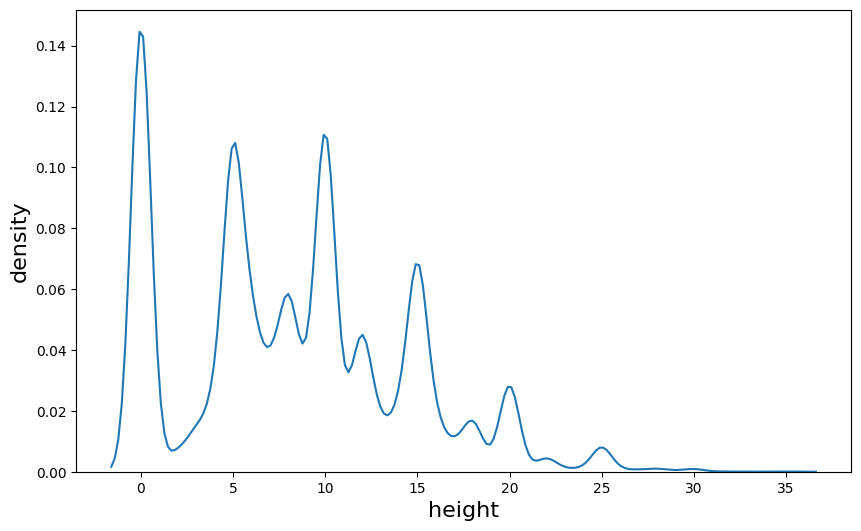

In [18]:
plt.figure(figsize= (10,6))
sns.distplot(data['circonference_cm'], hist = False, label = 'circumference')
plt.xlabel('circumference', fontsize = 16)
plt.ylabel('density', fontsize = 16)
plt.show()

plt.figure(figsize= (10,6))
sns.distplot(data['hauteur_m'], hist = False, label = 'circumference')
plt.xlabel('height', fontsize = 16)
plt.ylabel('density', fontsize = 16)
plt.show()

## Visualisation de la Répartition Géographique et Statistique des Arbres Remarquables à Paris

Nous utilisons GeoPandas pour créer une visualisation cartographique de la répartition des arbres remarquables à Paris. Les étapes comprennent le chargement des données des arrondissements et des arbres depuis des fichiers GeoJSON, le filtrage des arbres remarquables, la jointure des données pour associer les arbres remarquables aux arrondissements correspondants, et enfin la création d'une carte où les arrondissements sont représentés en gris clair et les arbres remarquables en rouge. Cette visualisation permet de comprendre rapidement la distribution spatiale des arbres remarquables dans la ville de Paris.


In [19]:
!pip install geopandas

Downloading...
From: https://drive.google.com/uc?export=download&id=10gwy5QWkxfeaozt5Wu9ESbXtfIATD9qs
To: /content/arrondissements_paris.geojson
100%|██████████| 200k/200k [00:00<00:00, 21.7MB/s]


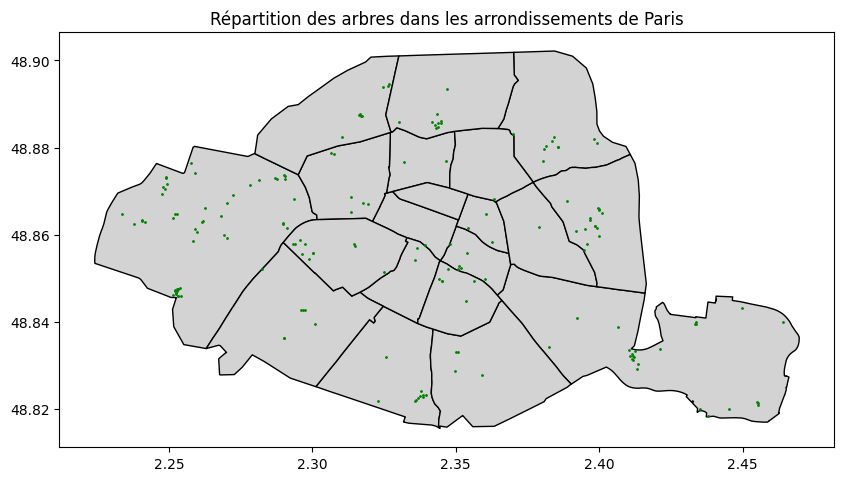

In [20]:
import gdown
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Lien vers le fichier GeoJSON sur Google Drive (modifié pour être directement téléchargeable)
url = 'https://drive.google.com/uc?export=download&id=10gwy5QWkxfeaozt5Wu9ESbXtfIATD9qs'

# Télécharger le fichier des arrondissements de Paris
output = 'arrondissements_paris.geojson'
gdown.download(url, output, quiet=False)

# Filtrer les arbres remarquables
data_remarquable = data[data['remarquable'] == 1]

# Création d'une géométrie point à partir des colonnes geo_point_2d_a et geo_point_2d_b
geometry = [Point(xy) for xy in zip(data_remarquable['geo_point_2d_b'], data_remarquable['geo_point_2d_a'])]

# Création d'un GeoDataFrame à partir des données des arbres et de la géométrie
arbres_gdf = gpd.GeoDataFrame(data_remarquable, geometry=geometry)

# Spécification du système de coordonnées (WGS 84 - EPSG:4326)
arbres_gdf.crs = "EPSG:4326"

# Chargement des données des arrondissements de Paris
arrondissements = gpd.read_file('arrondissements_paris.geojson')

# Création d'une nouvelle figure
fig, ax = plt.subplots(figsize=(10, 10))

# Affichage des arrondissements de Paris
arrondissements.plot(ax=ax, color='lightgrey', edgecolor='black')

# Affichage des arbres
arbres_gdf.plot(ax=ax, color='green', markersize=1)

# Ajout d'un titre
plt.title("Répartition des arbres dans les arrondissements de Paris")

# Affichage de la carte
plt.show()


In [21]:
# Nombre de points affichés sur la carte
nombre_points = len(arbres_gdf)
print("Nombre de points sur la carte :", nombre_points)

Nombre de points sur la carte : 179


Cette visualisation fournit un aperçu visuel de la répartition spatiale des arbres remarquables dans la ville de Paris. En observant la concentration des arbres remarquables sur la carte, vous pouvez identifier les zones où ces arbres sont les plus abondants ou les plus rares. Cette information peut être précieuse pour améliorer le processus d'entretien des arbres remarquables parisiens de plusieurs manières :

- **Identification des Zones à Forte Densité :** En repérant les zones avec une forte concentration d'arbres remarquables, vous pouvez prioriser ces zones pour un entretien régulier et intensif afin de préserver ces précieux atouts urbains.

- **Détection des Zones Déficitaires :** De même, en identifiant les zones où les arbres remarquables sont peu nombreux, vous pouvez concentrer vos efforts d'entretien et de plantation pour renforcer la diversité végétale et améliorer l'attrait esthétique et écologique de ces quartiers.

- **Planification d'Interventions Ciblées :** La visualisation peut également aider à planifier des interventions spécifiques telles que le traitement des maladies, ou la protection contre les dommages, en priorisant les zones où les arbres remarquables sont les plus présents ou les plus vulnérables.

En résumé, cette visualisation fournit une perspective géographique précieuse qui peut guider les décisions et les actions visant à améliorer et à préserver le patrimoine arboricole remarquable de la ville de Paris.

### Répartition des Espèces d'Arbres Remarquables à Paris

Cette visualisation explore la répartition des espèces d'arbres remarquables à Paris à travers un graphique de type camembert. L'objectif est de comprendre la diversité des espèces parmi les arbres remarquables de la ville. Pour cela, nous filtrons les données pour ne conserver que les arbres remarquables, puis comptons le nombre d'occurrences de chaque espèce parmi eux. Enfin, nous utilisons ces données pour créer un graphique camembert qui nous montre la répartition des espèces. Chaque segment du camembert représente une espèce, et la taille de chaque segment est proportionnelle à la fréquence de cette espèce parmi les arbres remarquables.


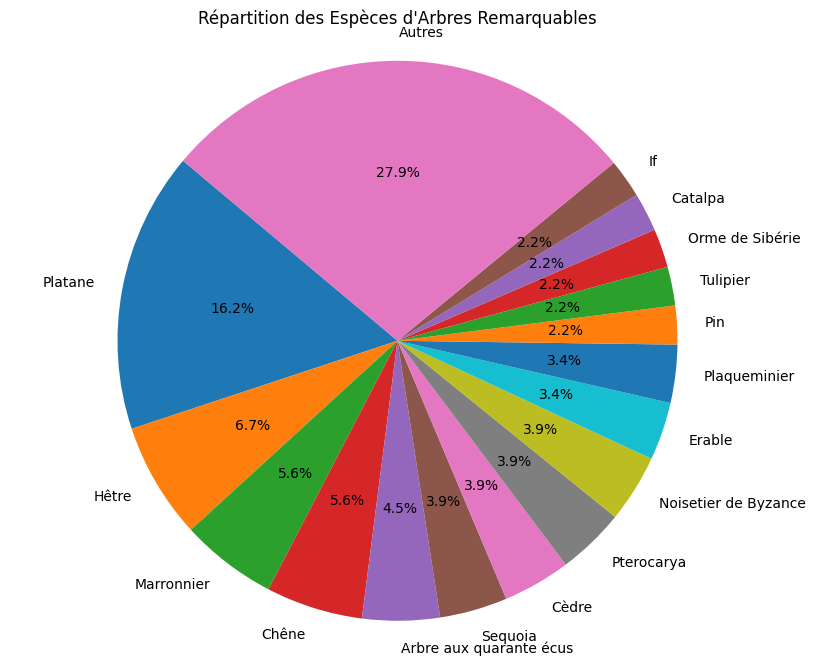

In [22]:
# Filtrer les arbres remarquables
arbres_remarquables = data[data['remarquable'] == 1]

# Compter le nombre d'occurrences de chaque espèce
occurrences_especes = arbres_remarquables['libelle_francais'].value_counts()

# Calculer les proportions
total = occurrences_especes.sum()
proportions = occurrences_especes / total

# Regrouper les espèces avec une proportion < 2.2% dans 'Autres'
autres = proportions[proportions < 0.022].sum()
proportions = proportions[proportions >= 0.022]
proportions['Autres'] = autres

# Créer un graphique camembert
plt.figure(figsize=(10, 8))
proportions.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Espèces d\'Arbres Remarquables')
plt.axis('equal')  # Pour assurer que le graphique est un cercle
plt.ylabel('')  # Pour supprimer l'étiquette de l'axe y
plt.show()


# Analyse bivariée

## Relation entre la Circonférence et la Hauteur des Arbres

Cette visualisation présente la relation entre la circonférence et la hauteur des arbres à Paris. Les données représentent la circonférence de chaque arbre en centimètres sur l'axe des abscisses et sa hauteur en mètres sur l'axe des ordonnées. Chaque point dans le nuage de points représente un arbre, et sa position reflète la circonférence et la hauteur de l'arbre correspondant. Cette visualisation permet d'observer visuellement s'il existe une relation entre ces deux variables et si cette relation est linéaire ou non.


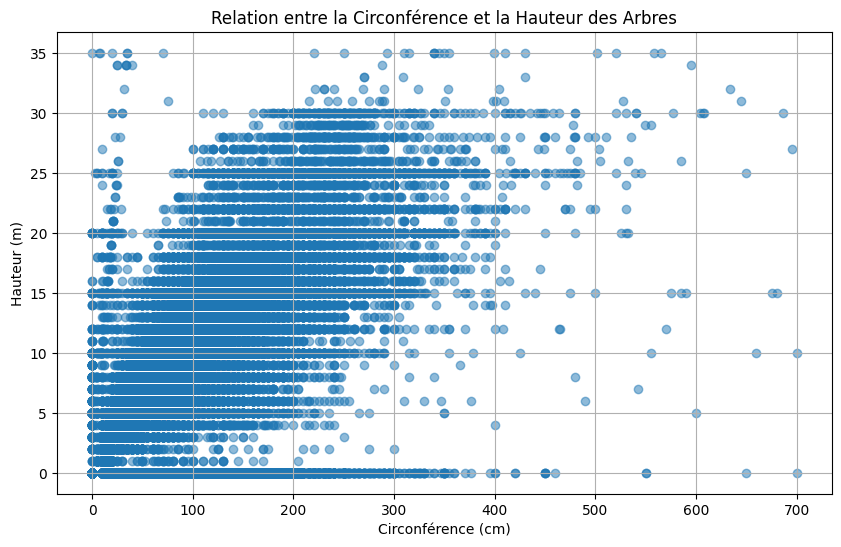

In [23]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['circonference_cm'], data['hauteur_m'], alpha=0.5)
plt.title('Relation entre la Circonférence et la Hauteur des Arbres')
plt.xlabel('Circonférence (cm)')
plt.ylabel('Hauteur (m)')
plt.grid(True)
plt.show()

Lorsqu'on examine ce graphique, on observe une tendance générale : les arbres qui ont une circonférence plus grande tendent également à avoir une hauteur plus grande. Cela se traduit par une dispersion des points qui suit une direction ascendante, illustrant ainsi une corrélation positive entre les deux variables. Cette corrélation positive suggère que, en général, les arbres avec des circonférences plus importantes ont tendance à être plus grands en hauteur.

# Conclusion

L'optimisation des tournées d'entretien des arbres en se basant sur la répartition des arbres par arrondissement et par domanialité ainsi que le stade de développement des arbres par arrondissement à Paris peut se faire en utilisant plusieurs stratégies. Voici quelques suggestions :

1. **Priorisation des Zones d'Entretien :** En utilisant les observations sur la concentration d'arbres par arrondissement, la ville peut prioriser les zones à fort besoin d'entretien, comme les arrondissements 15, 13, 16 et 20. Cela permettra une allocation plus efficace des ressources, en concentrant les efforts là où la densité d'arbres est la plus élevée.

2. **Identification des Zones de Faible Densité :** Les zones avec une densité d'arbres relativement faible, comme les arrondissements 6 à 1 et les Hauts-de-Seine, peuvent être identifiées comme des zones nécessitant une attention moindre. En diminuant l'entretien dans ces zones, la ville peut équilibrer la répartition des ressources et améliorer la couverture globale d'entretien des arbres.

3. **Segmentation des Catégories d'Entretien :** En analysant les caractéristiques spécifiques des catégories d'arbres, la ville peut définir des stratégies d'entretien différenciées. Par exemple, les arbres en "Alignement" pourraient nécessiter des interventions spécifiques par rapport à ceux dans des "Jardins". Cette segmentation permet une approche plus ciblée et adaptée aux besoins de chaque catégorie.

4. **Regroupement par Stade de Développement :** Divisez les arbres en groupes en fonction de leur stade de développement (par exemple, jeunes arbres, arbres matures, arbres nécessitant une intervention spécifique). Planifiez des tournées distinctes pour chaque groupe afin d'appliquer les soins appropriés en fonction du stade de développement. Si certaines catégories de stade de développement d'arbres nécessitent des soins spécifiques et donc du matériel spécialisé, planifiez les tournées en tenant compte de la répartition des différentes stade de développement des arbres. Exemple : si les jeunes arbres et arbres matures nécessitent plus de soins, planifiez plus de tournées sur certains arrondissement au nombre d'arbres j ou m plus important.
